## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Dictionary
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Installing and Importing necessary librariess

In [ ]:
!pip install --upgrade pandas==2.2.2 numpy>=1.25 protobuf>=5.26.1,<6.0dev tensorflow>=2.18,<2.19 matplotlib>=3.8.0 scikit-learn>=1.3.2 ml_dtypes>=0.4.0 -q --user --no-warn-script-location

/bin/bash: line 1: 6.0dev: No such file or directory


In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.24.1 pandas==1.5.3 -q --user --no-warn-script-location

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
train = pd.read_csv('/content/drive/My Drive/Python Course/Train.csv')
test = pd.read_csv('/content/drive/My Drive/Python Course/Test.csv')


## Data Overview

- Observations
- Sanity checks

**create functions for quick overview**

In [ ]:
# create a function for data overview (number of rows, columns, nulls, duplicates)
def overview(DataFrame):

  # calculate the shape of the dataset
  number_of_rows = DataFrame.shape[0]
  number_of_columns = DataFrame.shape[1]
  number_of_nulls = DataFrame.isnull().sum().sum()
  number_of_duplicates = DataFrame.duplicated().sum().sum()



  # create a dataframe to show the calculations
  overview = pd.DataFrame(
      {
      'number of rows': number_of_rows ,
      'number of columns': number_of_columns ,
      'number of missing values': number_of_nulls,
      'number of duplicates': number_of_duplicates,
      },index=[0],
  )


  return overview

**Data overview and sanity check**

**On Training set**

In [ ]:
#overview of train set
overview(train)

number of rows  number of columns  number of missing values  \
0           20000                 41                        36   

   number of duplicates  
0                     0

The training set has 20,000 rows and 41 columns, it has 36 missing values and no duplicates

In [ ]:
#info of train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

All variables in the training set are numerical, we can observe that there are some missing values in V1 and V2.

In [ ]:
train.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

**On Testing set**

In [ ]:
#overview of test set
overview(test)

number of rows  number of columns  number of missing values  \
0            5000                 41                        11   

   number of duplicates  
0                     0

The testing set has 5,000 rows and 41 columns, it has 11 missing values and no duplicates

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

All attributes in the testing set are numerical, and we can observe that there are some missing values in V1 and V2.

In [ ]:
test.describe().T

count      mean       std        min       25%       50%       75%  \
V1      4995.0 -0.277622  3.466280 -12.381696 -2.743691 -0.764767  1.831313   
V2      4994.0  0.397928  3.139562 -10.716179 -1.649211  0.427369  2.444486   
V3      5000.0  2.551787  3.326607  -9.237940  0.314931  2.260428  4.587000   
V4      5000.0 -0.048943  3.413937 -14.682446 -2.292694 -0.145753  2.166468   
V5      5000.0 -0.080120  2.110870  -7.711569 -1.615238 -0.131890  1.341197   
V6      5000.0 -1.042138  2.005444  -8.924196 -2.368853 -1.048571  0.307555   
V7      5000.0 -0.907922  1.769017  -8.124230 -2.054259 -0.939695  0.212228   
V8      5000.0 -0.574592  3.331911 -12.252731 -2.642088 -0.357943  1.712896   
V9      5000.0  0.030121  2.174139  -6.785495 -1.455712 -0.079891  1.449548   
V10     5000.0  0.018524  2.145437  -8.170956 -1.353320  0.166292  1.511248   
V11     5000.0 -2.008615  3.112220 -13.151753 -4.050432 -2.043122  0.044069   
V12     5000.0  1.576413  2.907401  -8.164048 -0.449674  1.488253  3.562626   
V13     5000.0  1.622456  2.882892 -11.548209 -0.126012  1.718649  3.464604   
V14     5000.0 -0.921097  1.803470  -7.813929 -2.110952 -0.896011  0.272324   
V15     5000.0 -2.452174  3.387041 -15.285768 -4.479072 -2.417131 -0.432943   
V16     5000.0 -3.018503  4.264407 -20.985779 -5.648343 -2.773763 -0.178105   
V17     5000.0 -0.103721  3.336513 -13.418281 -2.227683  0.047462  2.111907   
V18     5000.0  1.195606  2.586403 -12.214016 -0.408850  0.881395  2.604014   
V19     5000.0  1.210490  3.384662 -14.169635 -1.026394  1.295864  3.526278   
V20     5000.0  0.138429  3.657171 -13.719620 -2.325454  0.193386  2.539550   
V21     5000.0 -3.664398  3.577841 -16.340707 -5.944369 -3.662870 -1.329645   
V22     5000.0  0.961960  1.640414  -6.740239 -0.047728  0.986020  2.029321   
V23     5000.0 -0.422182  4.056714 -14.422274 -3.162690 -0.279222  2.425911   
V24     5000.0  1.088841  3.968207 -12.315545 -1.623203  0.912815  3.537195   
V25     5000.0  0.061235  2.010227  -6.770139 -1.298377  0.076703  1.428491   
V26     5000.0  1.847261  3.400330 -11.414019 -0.242470  1.917032  4.156106   
V27     5000.0 -0.552397  4.402947 -13.177038 -3.662591 -0.871982  2.247257   
V28     5000.0 -0.867678  1.926181  -7.933388 -2.159811 -0.930695  0.420587   
V29     5000.0 -1.095805  2.655454  -9.987800 -2.861373 -1.340547  0.521843   
V30     5000.0 -0.118699  3.023292 -12.438434 -1.996743  0.112463  1.946450   
V31     5000.0  0.468810  3.446324 -11.263271 -1.822421  0.485742  2.779008   
V32     5000.0  0.232567  5.585628 -17.244168 -3.556267 -0.076694  3.751857   
V33     5000.0 -0.080115  3.538624 -14.903781 -2.348121 -0.159713  2.099160   
V34     5000.0 -0.392663  3.166101 -14.699725 -2.009604 -0.171745  1.465402   
V35     5000.0  2.211205  2.948426 -12.260591  0.321818  2.111750  4.031639   
V36     5000.0  1.594845  3.774970 -12.735567 -0.866066  1.702964  4.104409   
V37     5000.0  0.022931  1.785320  -5.079070 -1.240526 -0.110415  1.237522   
V38     5000.0 -0.405659  3.968936 -15.334533 -2.984480 -0.381162  2.287998   
V39     5000.0  0.938800  1.716502  -5.451050 -0.208024  0.959152  2.130769   
V40     5000.0 -0.932406  2.978193 -10.076234 -2.986587 -1.002764  1.079738   
Target  5000.0  0.056400  0.230716   0.000000  0.000000  0.000000  0.000000   

              max  
V1      13.504352  
V2      14.079073  
V3      15.314503  
V4      12.140157  
V5       7.672835  
V6       5.067685  
V7       7.616182  
V8      10.414722  
V9       8.850720  
V10      6.598728  
V11      9.956400  
V12     12.983644  
V13     12.620041  
V14      5.734112  
V15     11.673420  
V16     13.975843  
V17     19.776592  
V18     13.642235  
V19     12.427997  
V20     13.870565  
V21     11.046925  
V22      7.505291  
V23     13.180887  
V24     17.806035  
V25      6.556937  
V26     17.528193  
V27     17.290161  
V28      7.415659  
V29     14.039466  
V30     10.314976  
V31     12.558928  
V32     26.539391  
V33     13.323517  
V34     12

**Summary of data overview**

1. There are 20k rows in the training set and 5k rows in the testing set

2. There are 41 columns in both training and testing sets

3. The training set has 36 missing values (v1 and V2) and no duplicates

4. The testing set has 11 missing values (v1 and V2) and no duplicates


## Exploratory Data Analysis (EDA)

In [ ]:
# #unifying the dataframes for the EDA

# df = train.append(test, ignore_index=True)
# print(df.shape)

In [ ]:
# creating a copy of the dataframe
df = train.copy()

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Plotting all the features at one go

In [ ]:
# histogram_boxplot(df, "V1", kde=True)

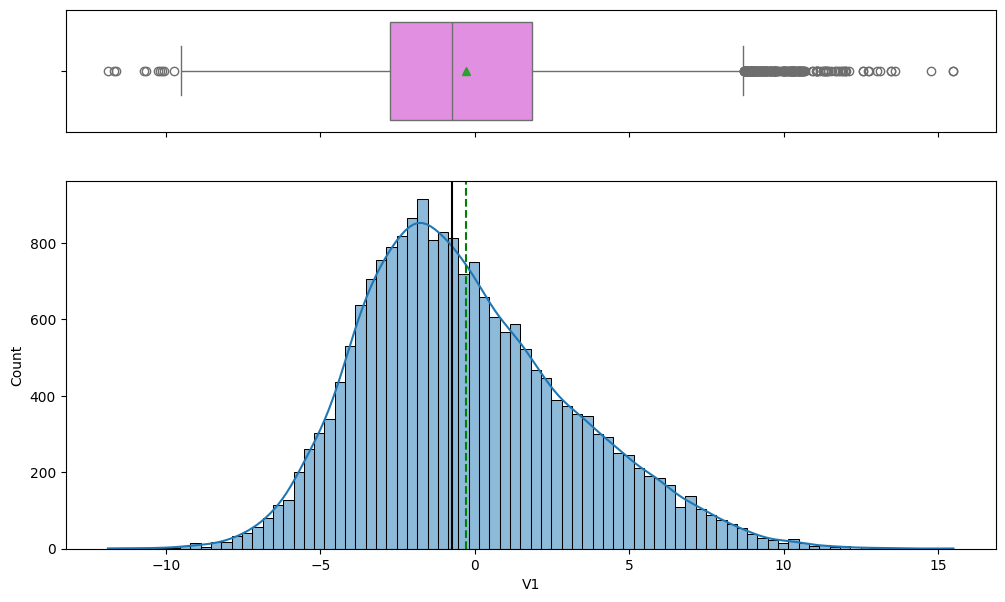

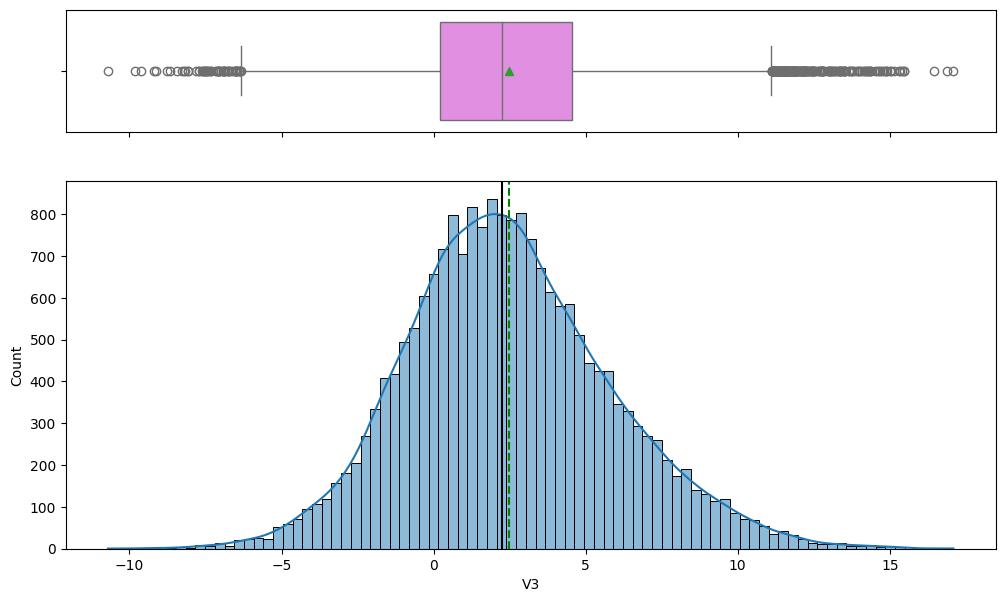

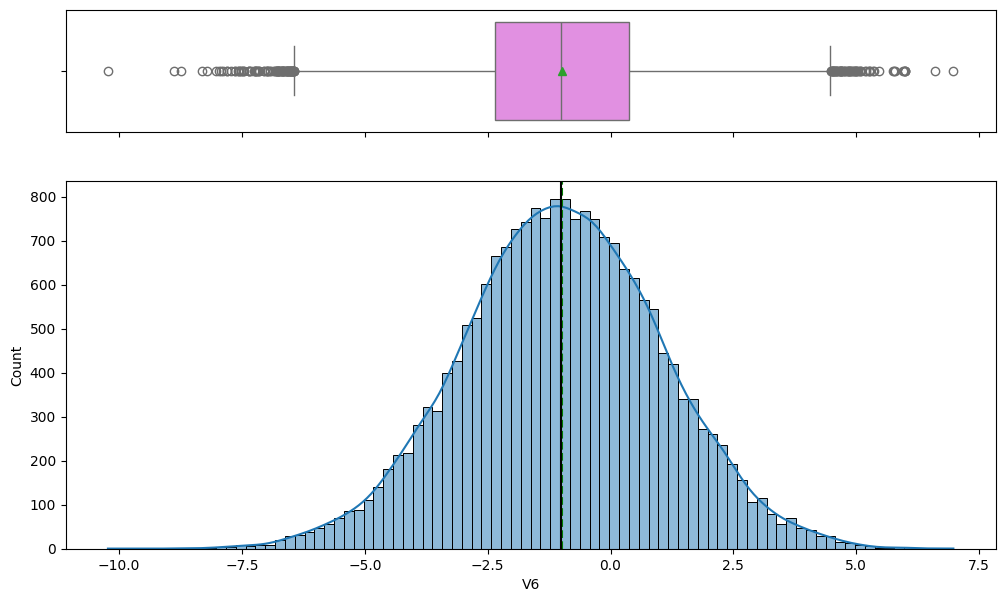

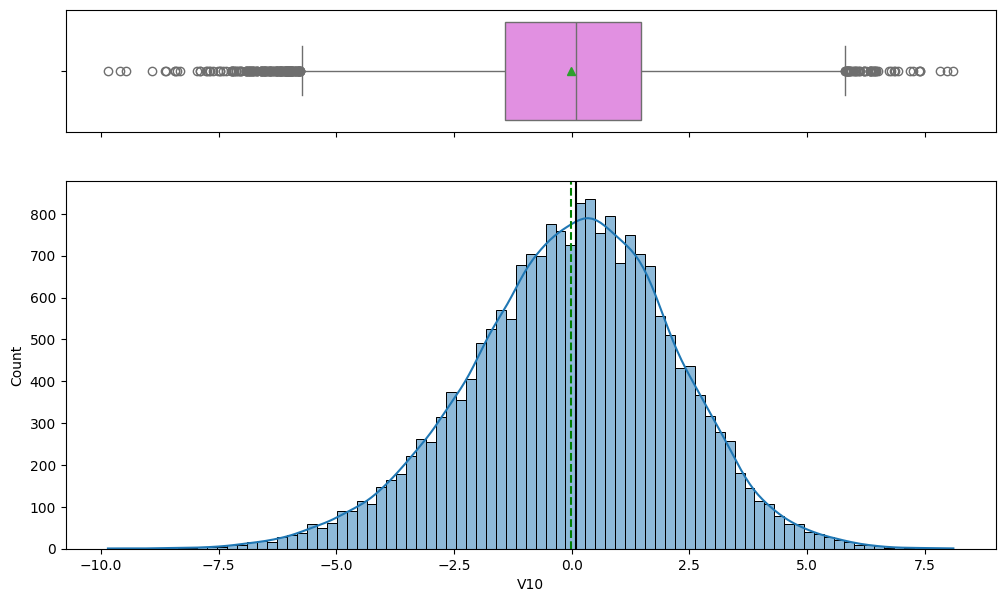

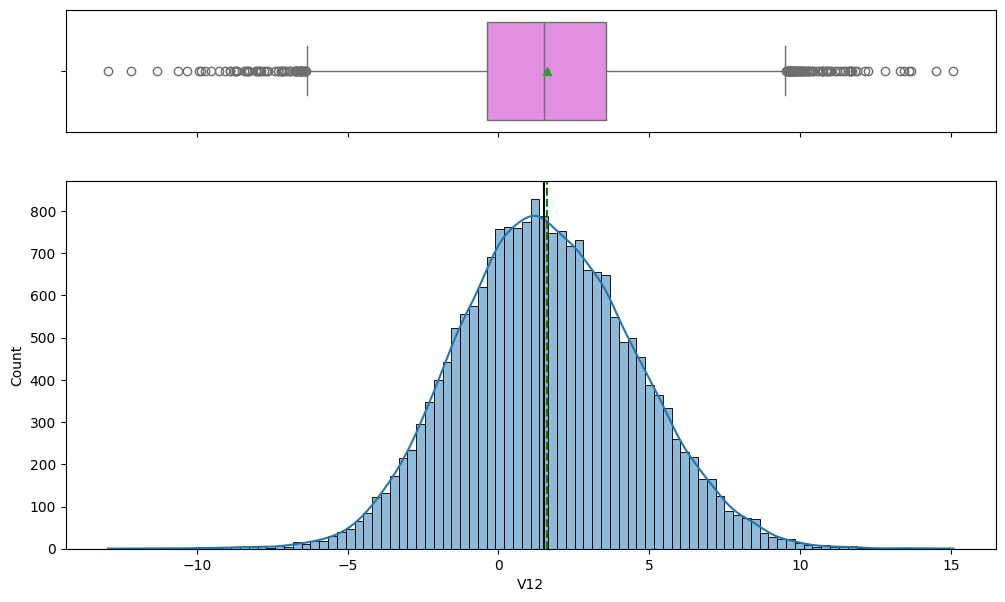

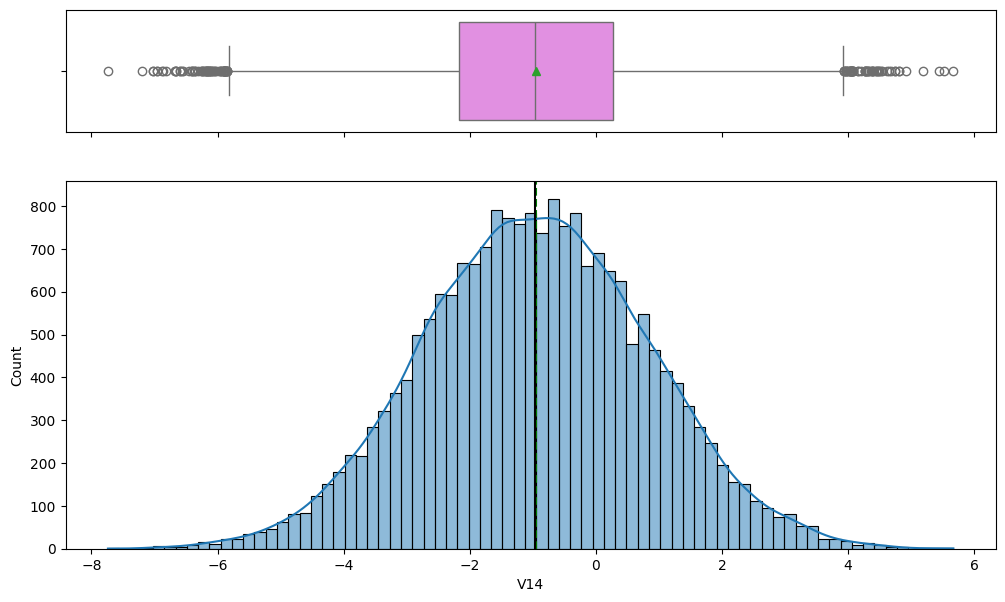

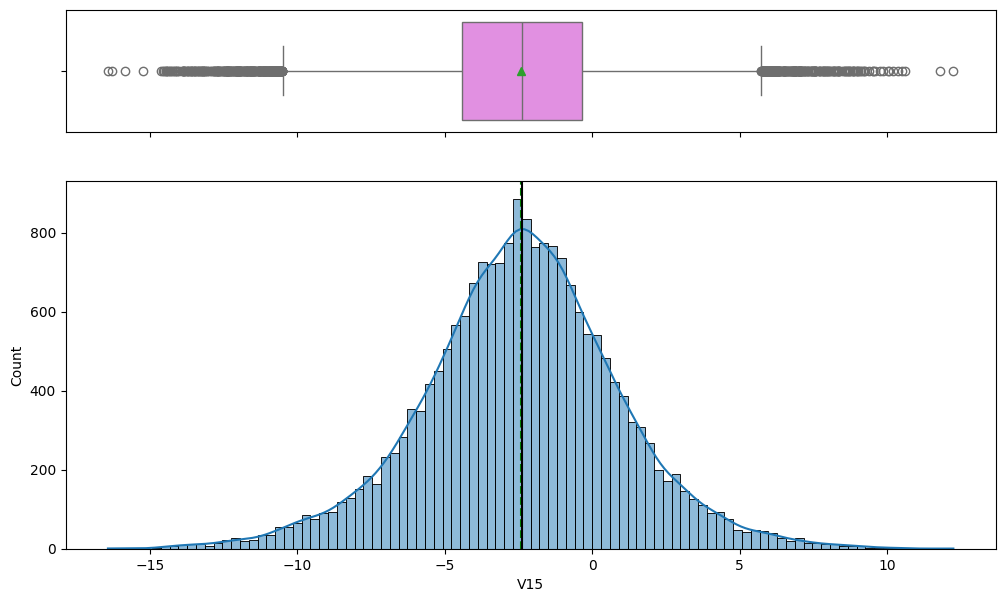

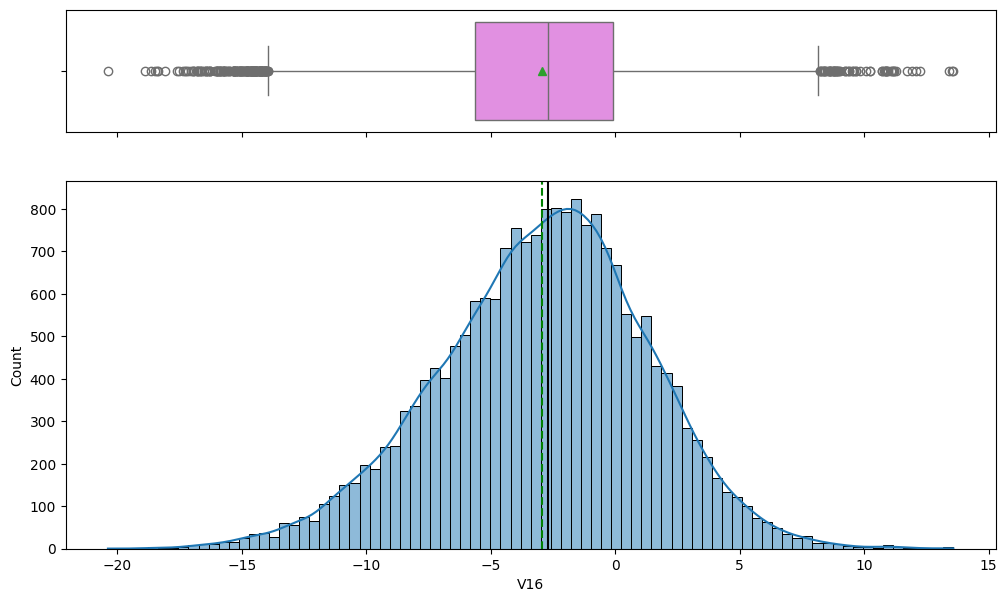

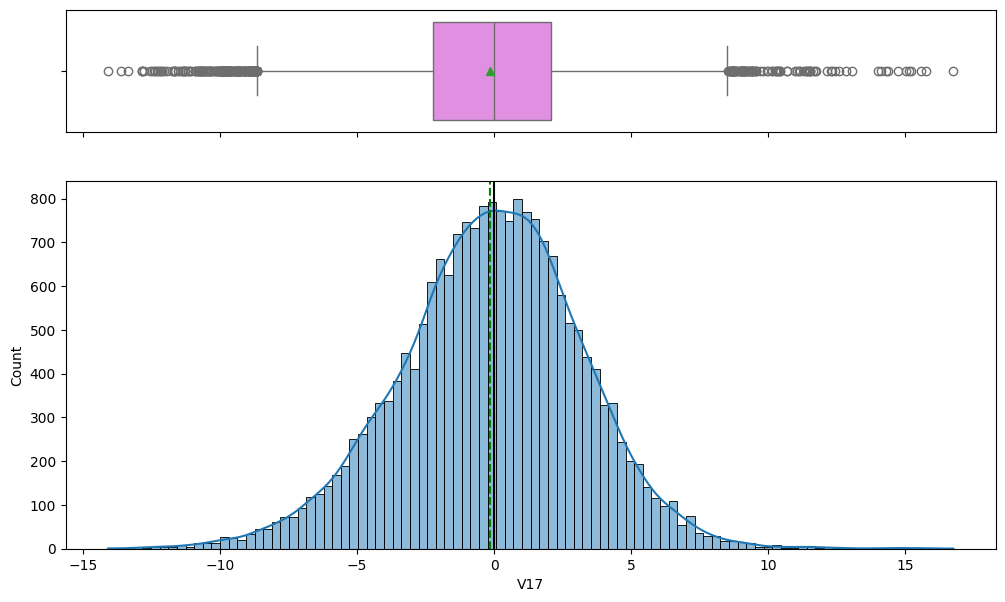

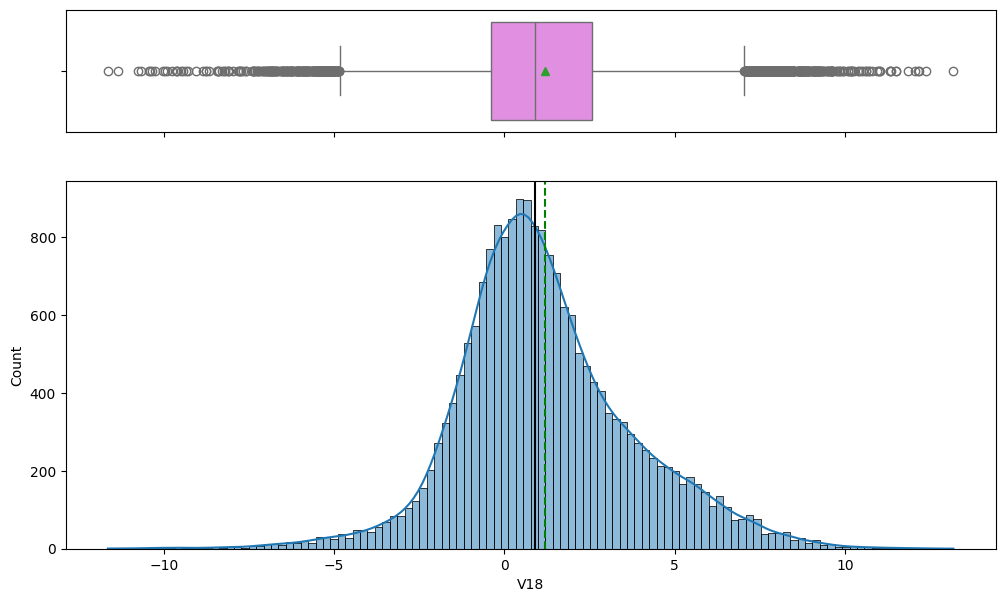

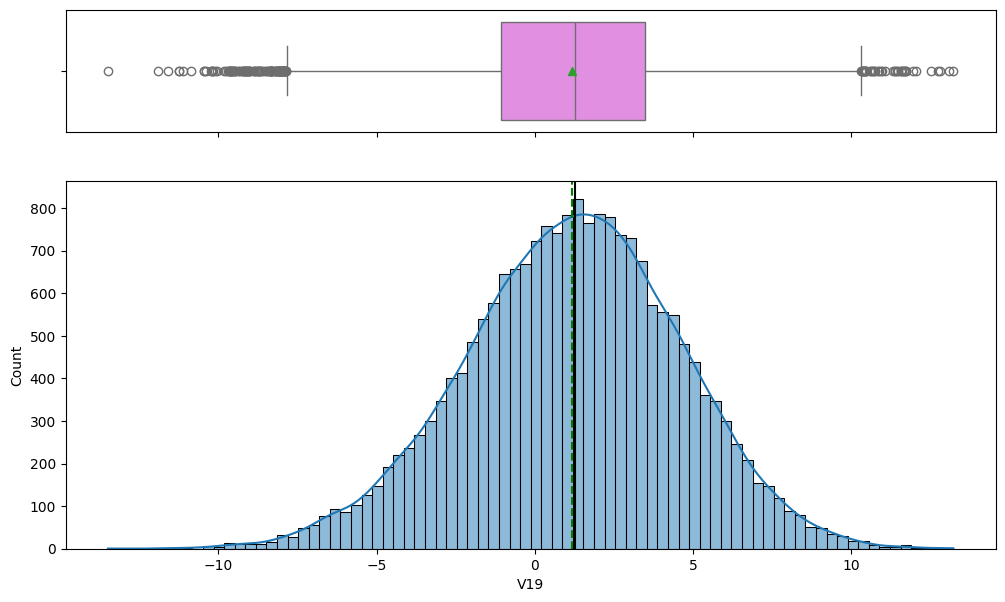

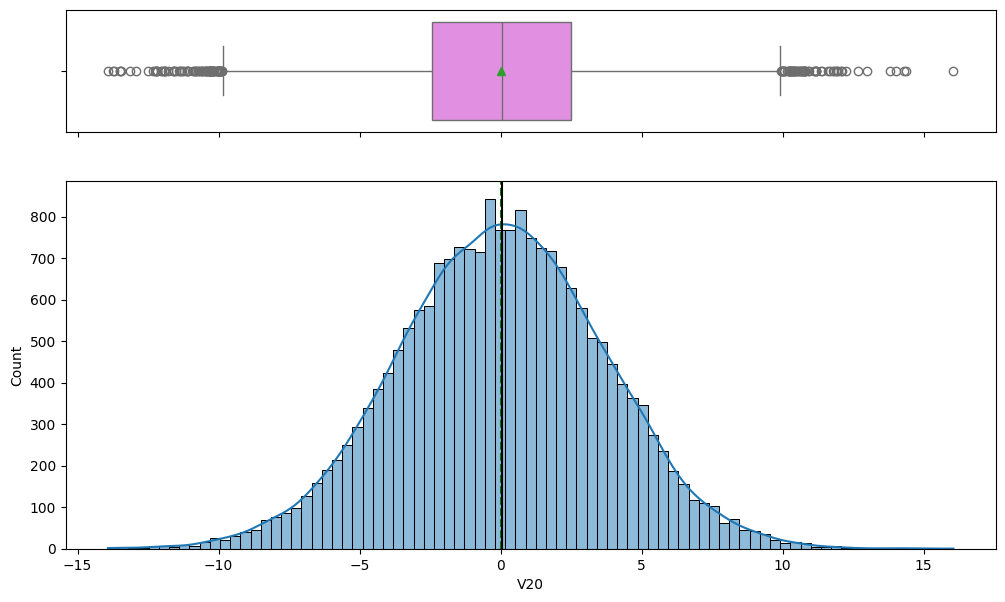

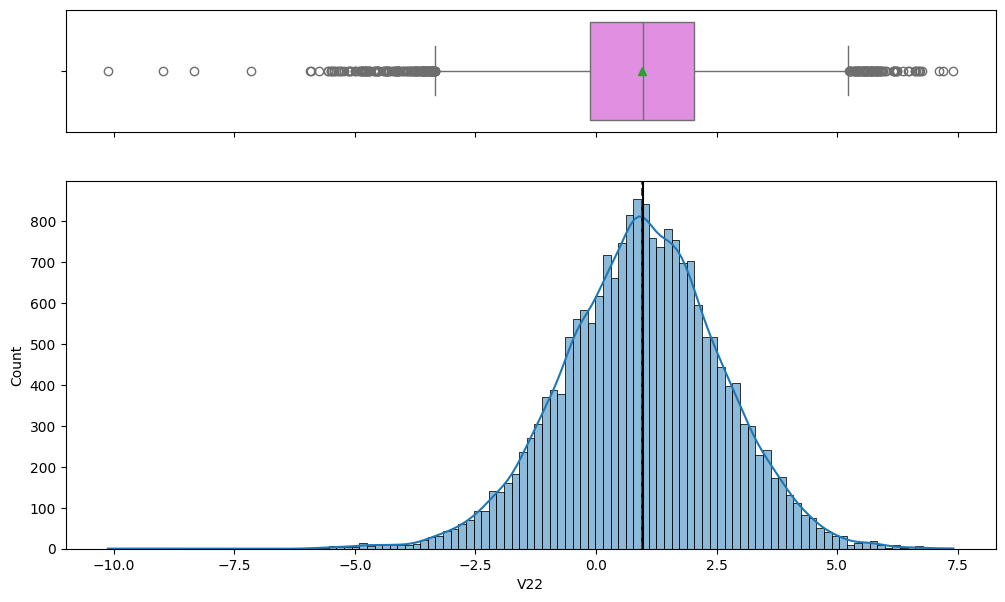

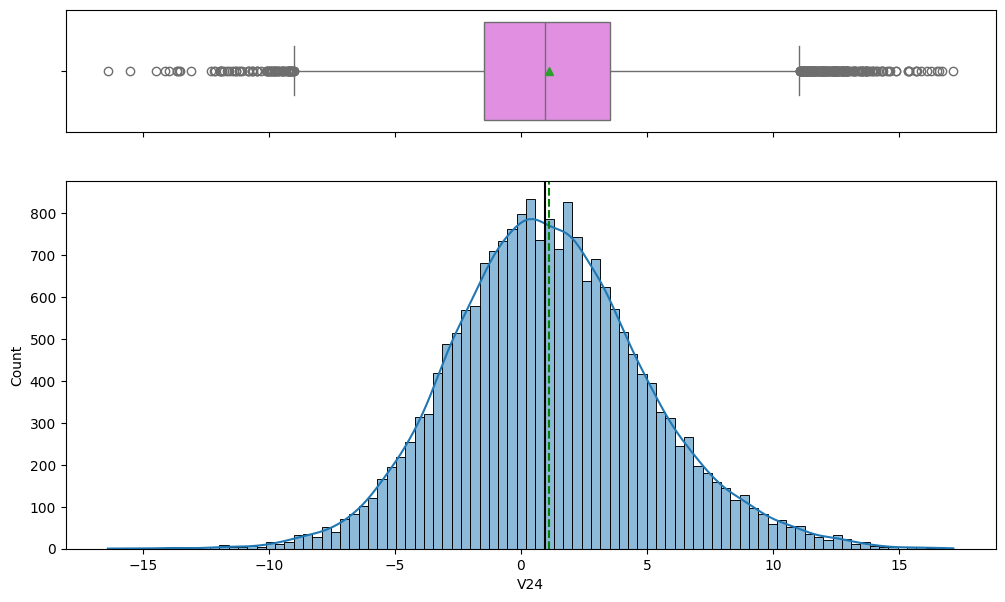

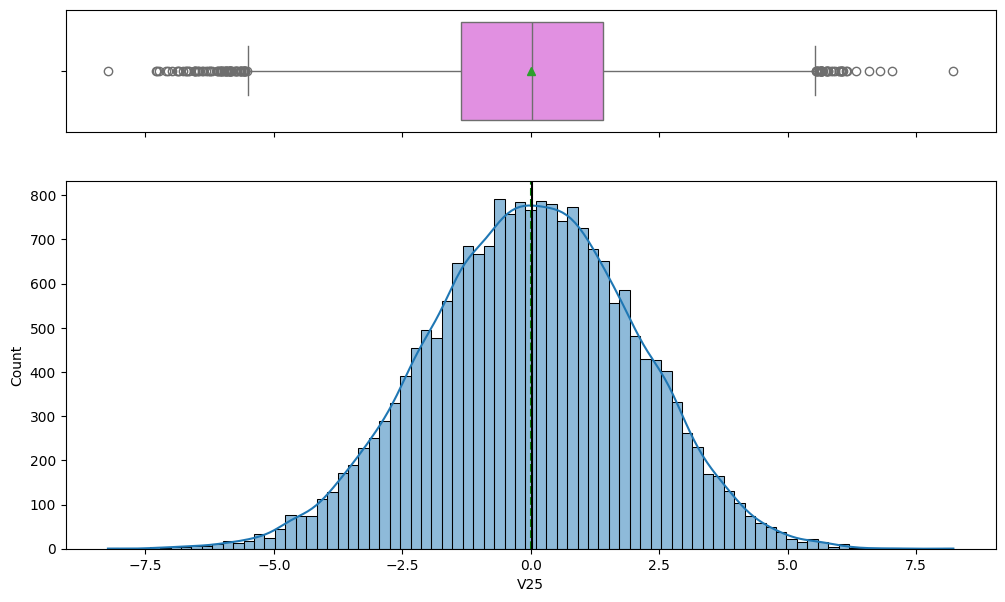

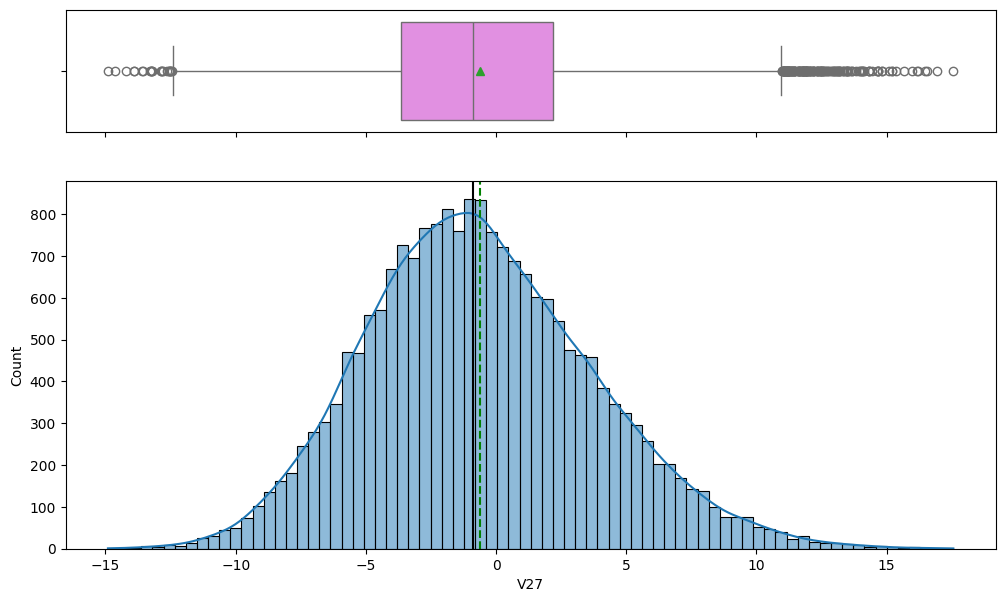

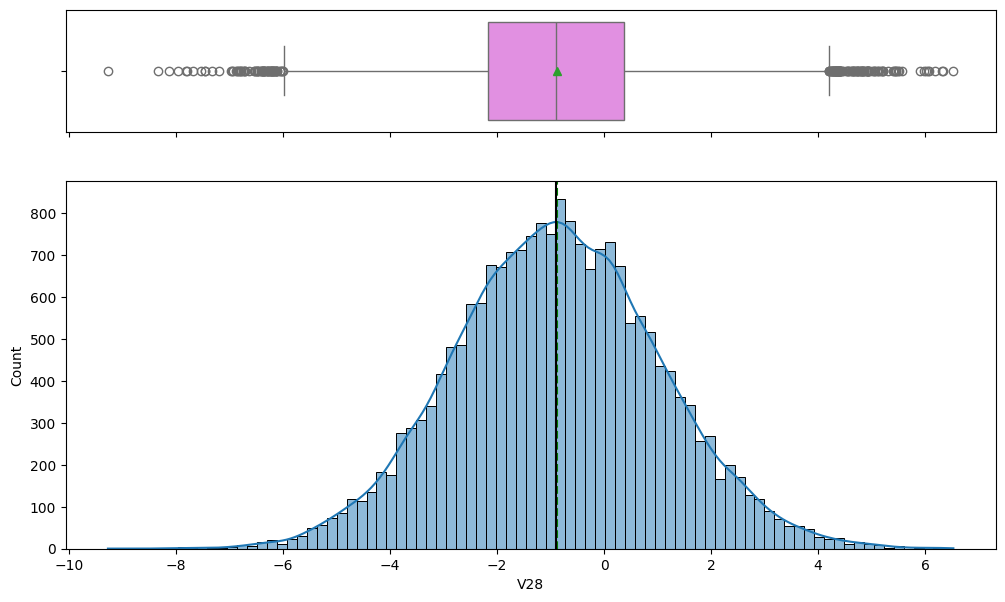

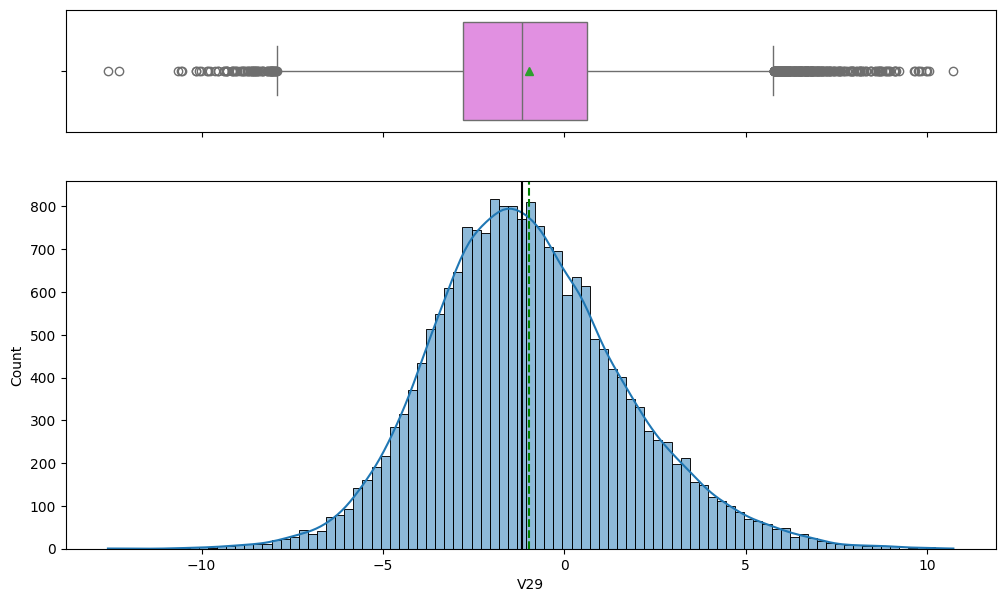

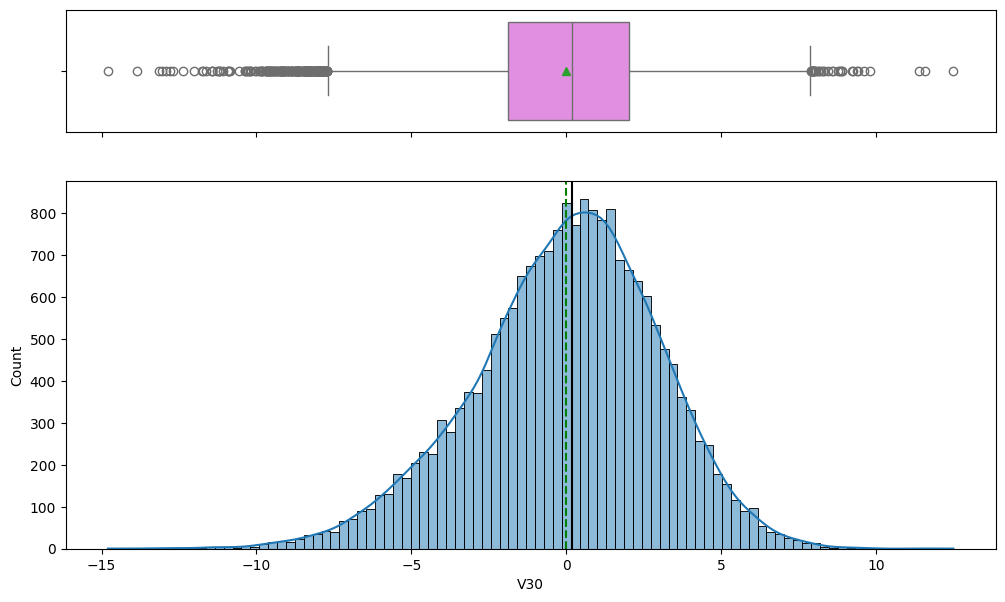

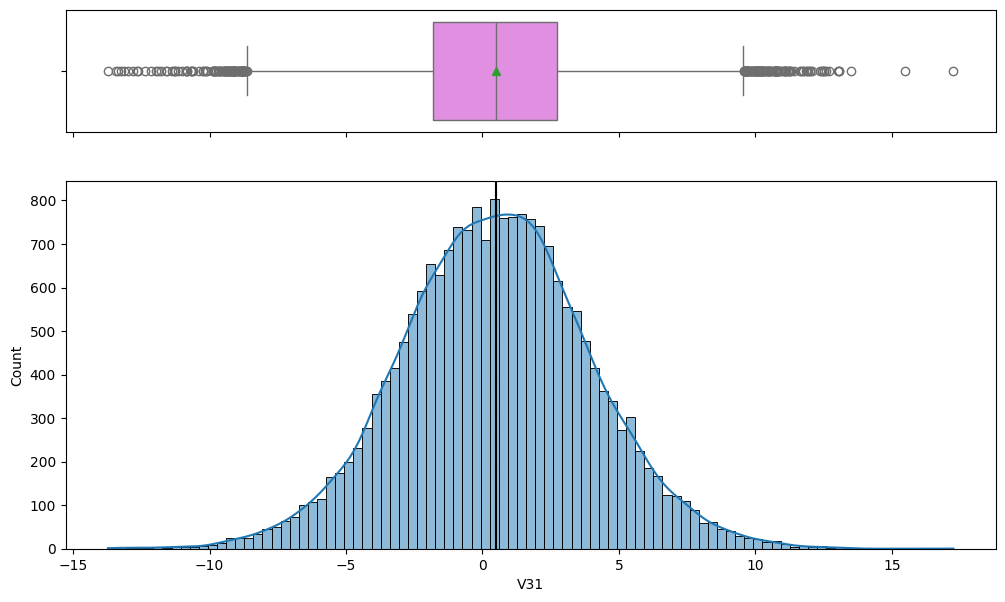

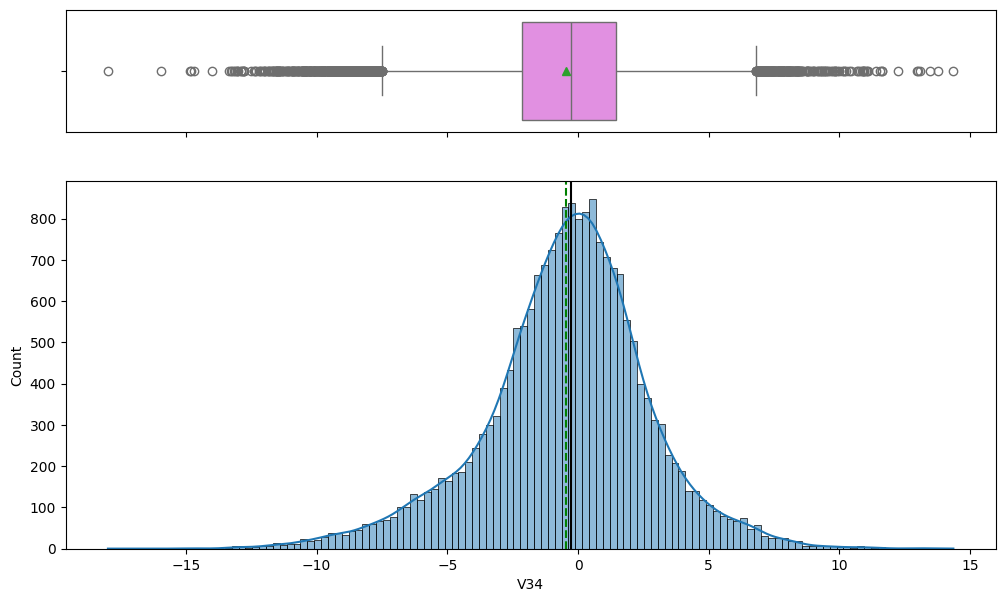

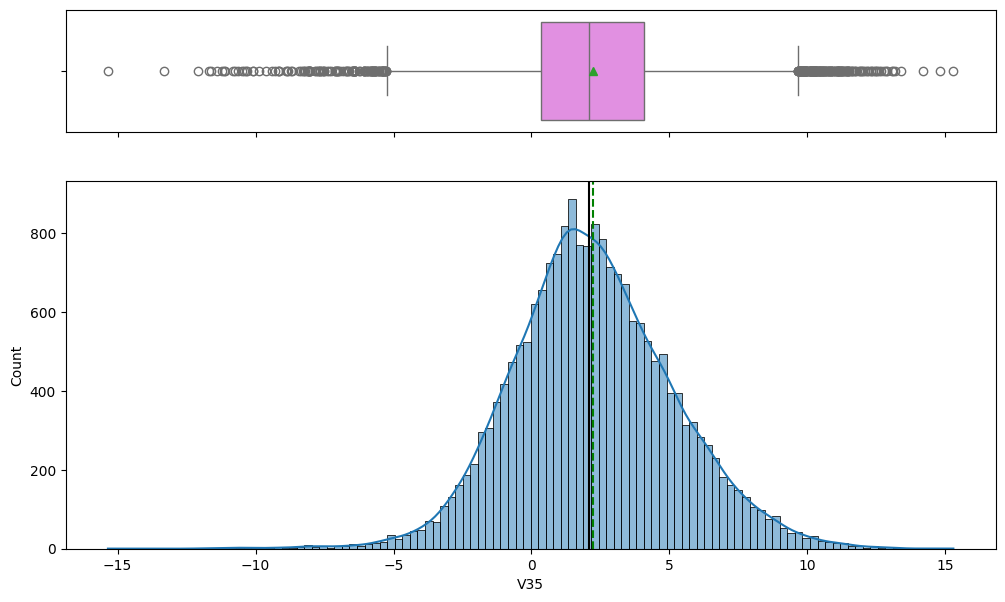

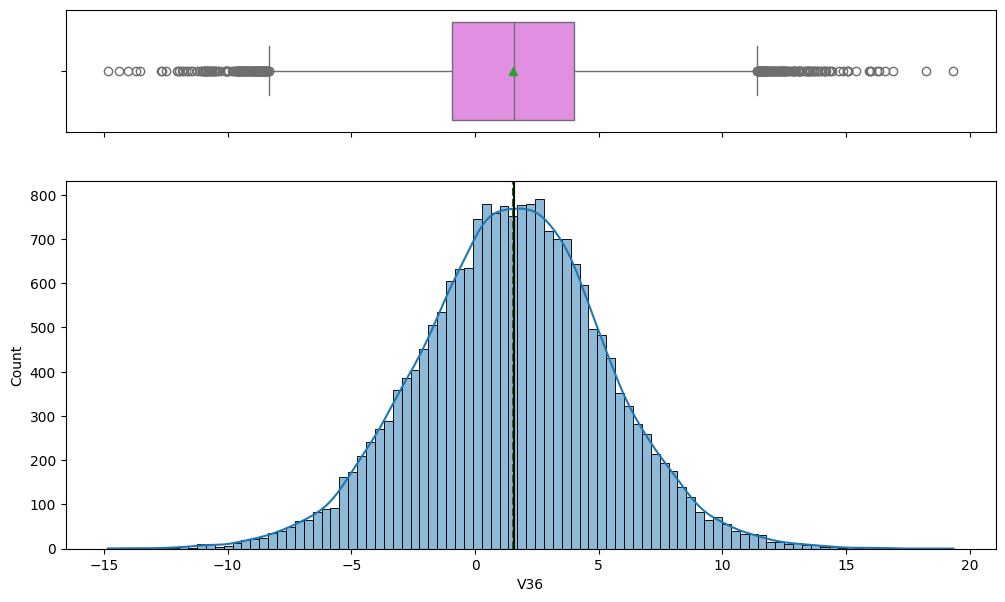

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None)

Insights:

•	We can notice that all independent variables have outliers

•	Most of the data follows a bell shape (normal curve)

•	Some of the variables have small skewness, and some are tail-like, such as V22, V18


In [ ]:
# Checking if this is a balanced Y variable data set

df['Target'].value_counts(normalize=True)*100

Target
0    94.45
1     5.55
Name: proportion, dtype: float64

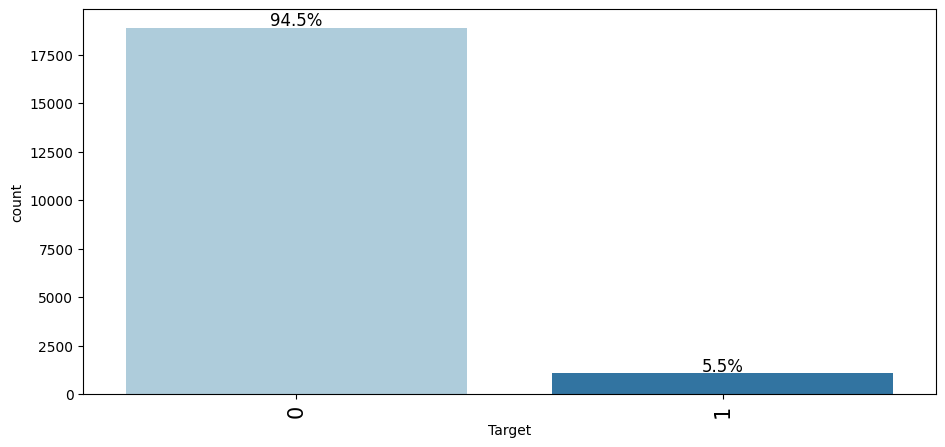

In [ ]:
labeled_barplot(df, "Target", perc=True, n=10)

The target variable is suffering from imbalanced distribution where the (0) is 94.5% and (1) is 5.5%.

## Bivariate Analysis

In [ ]:
# Checking if there's correlation between the data

plt.figure(figsize=(24,24))

corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True);


- There are various *dependent* features with high correlation, which indicates too much multicolinearity for regression models such as LG

- Not strong correlation to the target feature

Checking strongest correlations within the X variable with the target variable as colors

In [ ]:
sns.scatterplot(data=df, x='V15', y='V7', hue='Target');
plt.title('V15 agains V7')

Text(0.5, 1.0, 'V15 agains V7')

•	As V15 increases, V7 also increases in a nearly linear fashion.

•	These features are not independent, so in linear models, this could lead to multicollinearity.

•	Target 0 (blue) points are densely packed and mostly occupy the lower-left
region.

•	Target 1 (orange) points are more scattered and occupy a broader space, especially in the top-right region.


In [ ]:
sns.scatterplot(data=df, x='V16', y='V21', hue='Target');
plt.title('V16 agains V21')

Text(0.5, 1.0, 'V16 agains V21')

Strong positive correlation between V16 & V21 with concentration of failures at the edges, specially at the top edge

Text(0.5, 1.0, 'V24 agains V32')

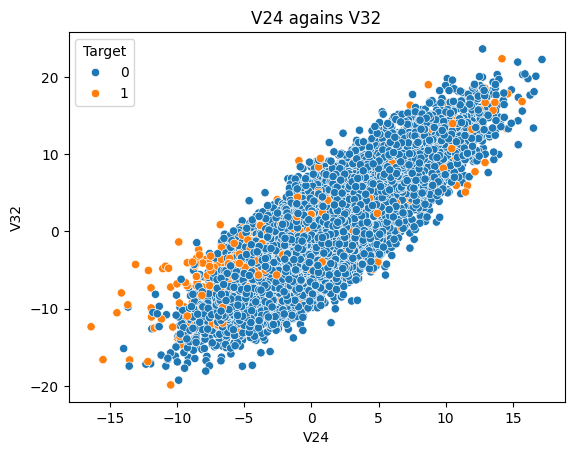

In [ ]:
sns.scatterplot(data=df, x='V24', y='V32', hue='Target');
plt.title('V24 agains V32')

•	V24 and V32 have a clear linear relationship, indicating very high multicollinearity.

•	Most data points are for Target = 0, forming a tight diagonal cluster.

•	Target = 1 points are more dispersed but noticeably denser in the lower-left quadrant (especially where both V24 and V32 are negative).


Text(0.5, 1.0, 'V2 agains V14')

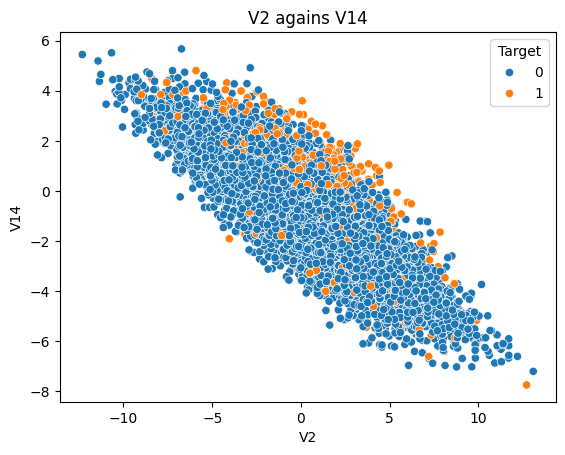

In [ ]:
sns.scatterplot(data=df, x='V2', y='V14', hue='Target');
plt.title('V2 agains V14')

Strong negative correlation between V2 & V14 with some concentration of failures at the middle right edges of the distribution

Text(0.5, 1.0, 'V27 agains V32')

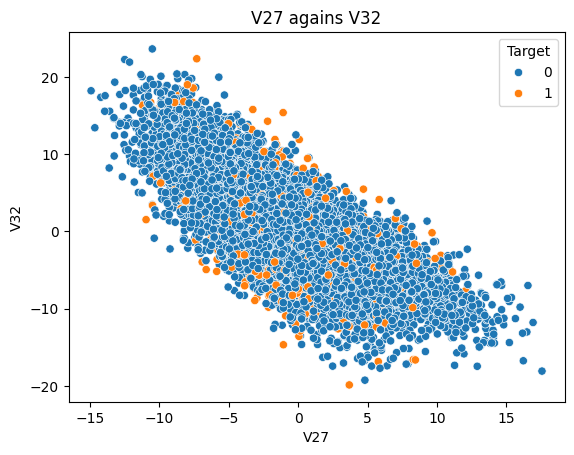

In [ ]:
sns.scatterplot(data=df, x='V27', y='V32', hue='Target');
plt.title('V27 agains V32')

Strong negative correlation between V27 & V32 with no pattern in the failures

Text(0.5, 1.0, 'V25 agains V30')

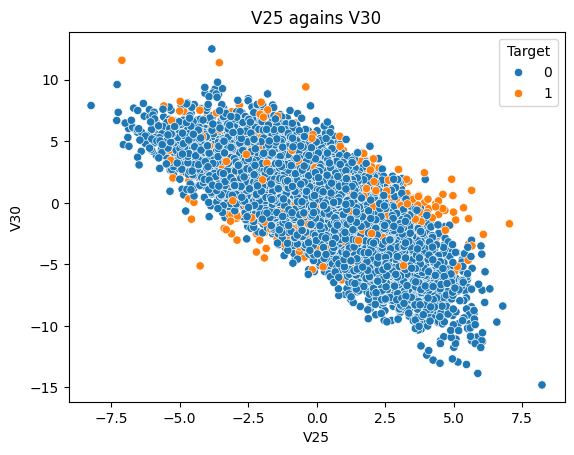

In [ ]:
sns.scatterplot(data=df, x='V25', y='V30', hue='Target');
plt.title('V25 agains V30')

•	Target 0 (blue) points dominate and are widely spread along the main diagonal trend.

•	Target 1 (orange) points appear more concentrated where V25 is between 1 and 5 and V30 is between -10 and 0.

•	This suggests that this region might have some predictive separation between the classes.


## Data Pre-processing

In [ ]:
# Checking if both datasets have similar imbalance in Y feature

print(train['Target'].value_counts(normalize=True))
print(test['Target'].value_counts(normalize=True))

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64


The data is stratified equally

To avoid data leakage, we will first split the dataset into the training file for training and validation.

In [ ]:
# separating the independent and dependent variables
X = train.drop(["Target"], axis=1)
y = train["Target"]

In [ ]:
# Splitting data into training, validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y)

print(X_train.shape, X_val.shape)

(16000, 40) (4000, 40)


In [ ]:
# Creating test data sets

X_test = test.drop(["Target"], axis=1)
y_test = test["Target"]

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(16000, 40) (4000, 40) (5000, 40)


## Missing value imputation




In [ ]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["V1"] = imp_median.fit_transform(X_train[["V1"]])

# transform the validation and test data using the imputer fit on train data
X_val["V1"] = imp_median.transform(X_val[["V1"]])
X_test["V1"] = imp_median.transform(X_test[["V1"]])

In [ ]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["V2"] = imp_median.fit_transform(X_train[["V2"]])

# transform the validation and test data using the imputer fit on train data
X_val["V2"] = imp_median.transform(X_val[["V2"]])
X_test["V2"] = imp_median.transform(X_test[["V2"]])

In [ ]:
#Checking if all null were fullfilled

print(X_train.isnull().sum())
print("*"*80)
print(X_val.isnull().sum())
print("*"*80)
print(X_test.isnull().sum())
print("*"*80)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
********************************************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
********************************************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V1

In [ ]:
#Checking all the Y variable proportions

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64
********************************************************************************


## Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model evaluation criterion

**Model can make wrong predictions as:**

1.	Predicting a generator will not fail, but in reality, it does.

2.	Predicting a generator will fail but it in reality doesn't.

The nature of predictions made by the classification model will translate as follows:

•	True positives (TP) are failures correctly predicted by the model.

•	False negatives (FN) are real failures in a generator where there is no detection by the model.

•	False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

•	We need to choose the metric that will ensure that the maximum number of generator failures are predicted correctly by the model.

•	We would want Recall to be maximized as the greater the Recall, the higher the chances of minimizing false negatives.

•	We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

Both cases are actually important for the purposes of this case study.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

As both errors are important for us to minimize; the company would want the F1 Score evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

As we are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Model 0

Let's start with a neural network consisting of

•	two hidden layers with 14 and 7 neurons, respectively

•	activation function of ReLU.

•	SGD as the optimizer


In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1148 - val_loss: 0.2570
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4611 - val_loss: 0.1992
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4045 - val_loss: 0.1832
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3813 - val_loss: 0.1749
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3695 - val_loss: 0.1736
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3609 - val_loss: 0.1740
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3541 - val_loss: 0.1717
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3473 - val_loss: 0.1683
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3438 - val_loss: 0.1656
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3369 - val_loss: 0.1639
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3303 - val_loss: 0.1629
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.025144815444946


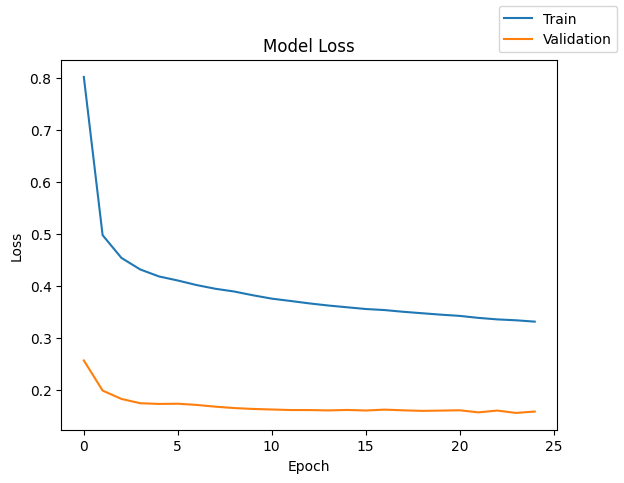

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


Accuracy    Recall  Precision  F1 Score
0  0.978625  0.978625   0.981568  0.979608

In [ ]:
model_0_valid_perf = model_performance_classification(model, X_val, y_val)
model_0_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.973   0.973   0.977543  0.974542

Train F1 score of ~0.97 and test F1 score of ~0.97 indicate consistent performance of the model between training and testing datasets.

Even though it's a good score, the rate of improvement over the epochs is still low.

### Model 1

After the 5th epoch, the model's rate of learning is low.

Let's try adding momentum to check whether it's accelerating the learning process.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9242 - val_loss: 0.4007
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4570 - val_loss: 0.3496
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4017 - val_loss: 0.2766
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3666 - val_loss: 0.2770
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3544 - val_loss: 0.1926
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3289 - val_loss: 0.1628
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3090 - val_loss: 0.1712
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3088 - val_loss: 0.1315
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2969 - val_loss: 0.1450
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3015 - val_loss: 0.1424
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2921 - val_loss: 0.1384
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.65141248703003


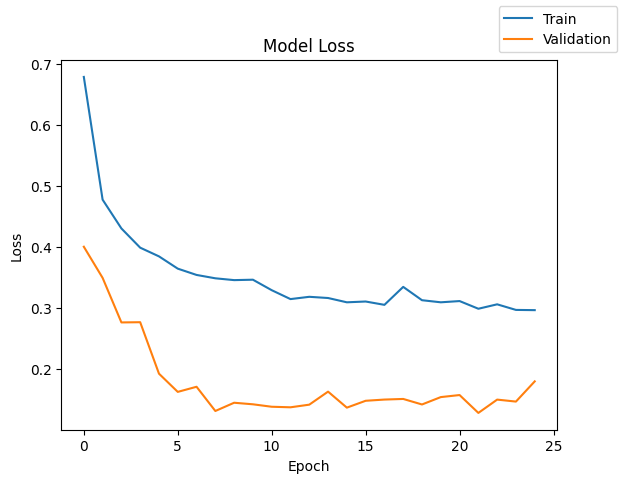

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.971187  0.971187    0.97777  0.973281

In [ ]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.97125  0.97125   0.976058  0.972915

There is no improvement in the train scores.

But, the difference between the train and valid scores have decreased.

### Model 2

Let's change the optimizer to Adam

This will introduce momentum as well as an adaptive learning rate

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0251 - val_loss: 0.3048
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4962 - val_loss: 0.2452
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4462 - val_loss: 0.2113
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4187 - val_loss: 0.1962
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3966 - val_loss: 0.1825
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3801 - val_loss: 0.1728
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3654 - val_loss: 0.1663
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3528 - val_loss: 0.1605
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3434 - val_loss: 0.1539
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3367 - val_loss: 0.1520
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3321 - val_loss: 0.1509
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.68262004852295


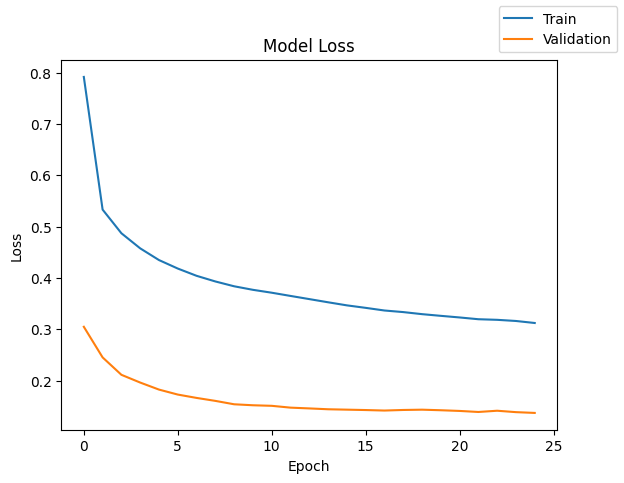

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.974875  0.974875   0.979611    0.9764

In [ ]:
model_2_valid_perf = model_performance_classification(model, X_val, y_val)
model_2_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.97525  0.97525   0.978357  0.976357

The difference between the train and valid scores have decreased.

### Model 3

The difference between the train loss and test loss is high.

Let's add dropout to regularize it.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7860 - val_loss: 0.4481
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0513 - val_loss: 0.3645
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8731 - val_loss: 0.3267
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7636 - val_loss: 0.3204
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7004 - val_loss: 0.3008
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6737 - val_loss: 0.2743
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6246 - val_loss: 0.2691
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6324 - val_loss: 0.2619
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5777 - val_loss: 0.2277
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5768 - val_loss: 0.2595
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5481 - val_loss: 0.2350
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  26.09148073196411


In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.978375  0.978375   0.980588  0.979173

In [ ]:
model_3_valid_perf = model_performance_classification(model, X_val, y_val)
model_3_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.97675  0.97675   0.979002  0.977587

The difference between train and validation scores has increased.

### Model 4

Let's add batch normalization to see whether we can stabilize the training process and thereby improve the scores.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0451 - val_loss: 0.3885
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6309 - val_loss: 0.2784
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5025 - val_loss: 0.2107
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4430 - val_loss: 0.1884
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4165 - val_loss: 0.1743
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3989 - val_loss: 0.1706
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3837 - val_loss: 0.1676
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3723 - val_loss: 0.1638
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3666 - val_loss: 0.1591
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3594 - val_loss: 0.1529
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3512 - val_loss: 0.1550
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  31.96936583518982


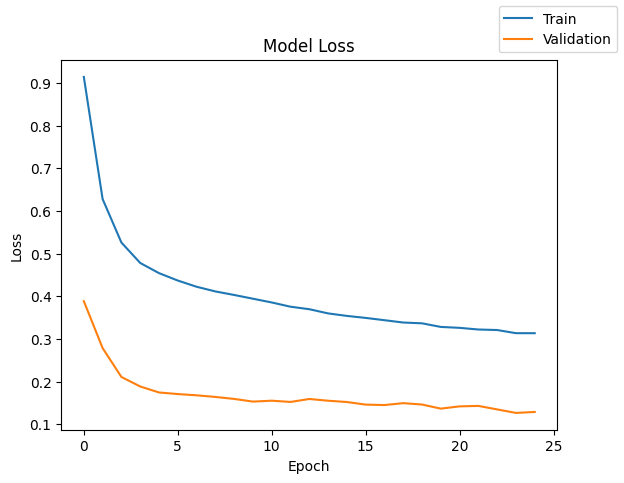

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.972313  0.972313   0.978062  0.974169

In [ ]:
model_4_valid_perf = model_performance_classification(model, X_val, y_val)
model_4_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.97075  0.97075   0.976334  0.972628

There's no improvement in the scores.

### Model 5

Let's add both batchnormalization and dropout.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6878 - val_loss: 0.5328
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0553 - val_loss: 0.4620
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8995 - val_loss: 0.3920
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7835 - val_loss: 0.3329
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7029 - val_loss: 0.2931
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6876 - val_loss: 0.2702
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6473 - val_loss: 0.2586
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6268 - val_loss: 0.2322
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6082 - val_loss: 0.2317
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5990 - val_loss: 0.2119
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5882 - val_loss: 0.2189
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.335647583007812


In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.9605  0.9605   0.971753  0.964207

In [ ]:
model_5_valid_perf = model_performance_classification(model, X_val, y_val)
model_5_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0     0.958   0.958    0.96975  0.961969

Scores is decreased

### Model 6

Let's initialize the weights using He normal.

We'll also use only Dropout for regularization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9353 - val_loss: 0.5017
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9559 - val_loss: 0.4032
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7951 - val_loss: 0.3348
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7384 - val_loss: 0.3219
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6949 - val_loss: 0.2951
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6286 - val_loss: 0.2749
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6241 - val_loss: 0.2769
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6063 - val_loss: 0.2510
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5860 - val_loss: 0.2481
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5627 - val_loss: 0.2472
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5503 - val_loss: 0.2513
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.436729431152344


In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.980062  0.980062   0.981819  0.980704

In [ ]:
model_6_valid_perf = model_performance_classification(model, X_val, y_val)
model_6_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0     0.979   0.979   0.980642  0.979623

There's a slight improvement in the scores.

The difference between train and validation scores has also reduced.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
models_train_comp_df

Neural Network (SGD, No Regularization)  \
Accuracy                                  0.978625   
Recall                                    0.978625   
Precision                                 0.981568   
F1 Score                                  0.979608   

           Neural Network (SGD with Momentum, No Regularization)  \
Accuracy                                            0.971187       
Recall                                              0.971187       
Precision                                           0.977770       
F1 Score                                            0.973281       

           Neural Network (Adam , No Regularization)  \
Accuracy                                    0.974875   
Recall                                      0.974875   
Precision                                   0.979611   
F1 Score                                    0.976400   

           Neural Network (Adam, dropout [0.4,0.2])  \
Accuracy                                   0.978375   
Recall                                     0.978375   
Precision                                  0.980588   
F1 Score                                   0.979173   

           Neural Network (Adam, Batch Normalization)  \
Accuracy                                     0.972313   
Recall                                       0.972313   
Precision                                    0.978062   
F1 Score                                     0.974169   

           Neural Network (dropout [0.4,0.2], Batch Normalization)  \
Accuracy                                            0.960500         
Recall                                              0.960500         
Precision                                           0.971753         
F1 Score                                            0.964207         

           Neural Network (Adam,dropout [0.4,0.2] ,He initialization)  
Accuracy                                            0.980062           
Recall                                              0.980062           
Precision                                           0.981819           
F1 Score                                            0.980704

In [ ]:
models_valid_comp_df

Neural Network (SGD, No Regularization)  \
Accuracy                                  0.973000   
Recall                                    0.973000   
Precision                                 0.977543   
F1 Score                                  0.974542   

           Neural Network (SGD with Momentum, No Regularization)  \
Accuracy                                            0.971250       
Recall                                              0.971250       
Precision                                           0.976058       
F1 Score                                            0.972915       

           Neural Network (Adam , No Regularization)  \
Accuracy                                    0.975250   
Recall                                      0.975250   
Precision                                   0.978357   
F1 Score                                    0.976357   

           Neural Network (Adam, dropout [0.4,0.2])  \
Accuracy                                   0.976750   
Recall                                     0.976750   
Precision                                  0.979002   
F1 Score                                   0.977587   

           Neural Network (Adam, Batch Normalization)  \
Accuracy                                     0.970750   
Recall                                       0.970750   
Precision                                    0.976334   
F1 Score                                     0.972628   

           Neural Network (dropout [0.4,0.2], Batch Normalization)  \
Accuracy                                            0.958000         
Recall                                              0.958000         
Precision                                           0.969750         
F1 Score                                            0.961969         

           Neural Network (Adam,dropout [0.4,0.2] ,He initialization)  
Accuracy                                            0.979000           
Recall                                              0.979000           
Precision                                           0.980642           
F1 Score                                            0.979623

In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD, No Regularization)                       0.005066
Neural Network (SGD with Momentum, No Regularization)         0.000365
Neural Network (Adam , No Regularization)                     0.000043
Neural Network (Adam, dropout [0.4,0.2])                      0.001586
Neural Network (Adam, Batch Normalization)                    0.001541
Neural Network (dropout [0.4,0.2], Batch Normalization)       0.002238
Neural Network (Adam,dropout [0.4,0.2] ,He initialization)    0.001081
Name: F1 Score, dtype: float64

**Final Model:** Neural Network (Adam + Dropout [0.4, 0.2] + He Initialization)

**Reasoning:**
Best F1 score on the training set (~0.9807), indicating strong performance in learning from the training data.

Best F1 score on the validation set (~0.9796), demonstrating good performance in generalizing to unseen data.

**Balanced Performance:**

Both precision and recall are high and well-balanced, indicating it’s not not overfitting or underfitting.

Minimal gap between training and validation metrics → good generalization.

### Final Model

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0770 - val_loss: 0.3691
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1488 - val_loss: 0.3487
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8850 - val_loss: 0.3174
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8137 - val_loss: 0.3206
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7281 - val_loss: 0.2975
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6738 - val_loss: 0.3106
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6317 - val_loss: 0.2776
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6340 - val_loss: 0.2643
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5931 - val_loss: 0.2608
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6111 - val_loss: 0.2672
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5807 - val_loss: 0.2535
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15112
           1       0.74      0.90      0.81       888

    accuracy                           0.98     16000
   macro avg       0.87      0.94      0.90     16000
weighted avg       0.98      0.98      0.98     16000



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3778
           1       0.72      0.86      0.79       222

    accuracy                           0.97      4000
   macro avg       0.86      0.92      0.89      4000
weighted avg       0.98      0.97      0.97      4000



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4718
           1       0.73      0.85      0.79       282

    accuracy                           0.97      5000
   macro avg       0.86      0.92      0.89      5000
weighted avg       0.98      0.97      0.98      5000



- The weighted F1 score on the test data is ~98

- An F1 score of ~0.98 indicates a good balance between precision and recall, suggesting moderate performance in accurately classifying instances with minimal false positives and false negatives.

- Model can be further tuned to deal with minority class.

## Business Insights and Recommendations

•	We tried to maximize recall as the cost of false negatives is high. A false negative would result in replacing the generator, which is costlier than repairs and inspections.

•	The model achieves an excellent weighted F1 score (~0.98) on test data, reflecting a strong balance of precision and recall, especially in handling the majority class.

•	Minority class (failures) prediction shows decent recall and precision, but there is room for improvement to minimize costly missed failure detections.

•	Some data was missing and values were inputted using median to avoid disrupting the distribution.

•	Outliers exist in all independent variables, which may affect model performance, particularly for models sensitive to extremes.

•	Most features follow a normal distribution, with a few (like V22 and V18) showing skewness or long tails — a potential signal of rare but significant conditions.

•	Multicollinearity is high among some variables (e.g., V15 vs V7, V24 vs V32, V16 vs V21), which could distort predictions in linear models and mislead feature importance.


•	One can employ techniques like oversampling minority classes, using appropriate evaluation metrics (e.g., F1-score), or employing ensemble methods like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. Ensuring a balanced dataset is crucial for model training to avoid biased predictions.




## Executive Conclusion

The ReneWind failure prediction model shows exceptional performance with a strong F1 score, making it a highly effective tool for predictive maintenance. However, to minimize costly false negatives and further enhance the value of the system, tuning for class imbalance, reducing multicollinearity, and emphasizing interpretability are the next strategic steps. These enhancements will improve failure capture while reinforcing operational reliability, ultimately leading to significant cost savings and longer equipment lifespan.